In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
BHNames= ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
#data_set = pd.read_csv(url,delim_whitespace=True,names=BHNames)
data_set = pd.read_csv('housing data.csv',delim_whitespace=True,names=BHNames)
data_set.head(5) 


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
summary = data_set.describe()
summary = summary.transpose()
print(summary)

         count        mean         std        min         25%        50%  \
crim     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
black    506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
lstat    506

In [5]:
# To Scale data form 0 to 1 apply preprocess Mms!
import sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(data_set))

DataScaled = scaler.fit_transform(data_set)
DataScaled = pd.DataFrame(DataScaled, columns= BHNames)

summary = DataScaled.describe()
summary = summary.transpose()
print(summary)

MinMaxScaler()
         count      mean       std  min       25%       50%       75%  max
crim     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
zn       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
indus    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
chas     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
nox      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
rm       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
age      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
ptratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
black    506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat    5

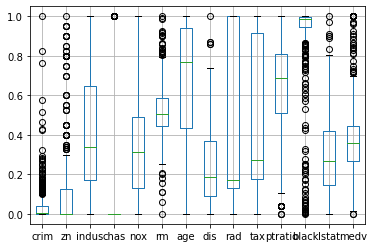

In [6]:
import matplotlib.pyplot as plt
boxplot = DataScaled.boxplot(column=BHNames)
plt.show()

In [7]:
# All column are in varialtion form
CorData = DataScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    print(CorData)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

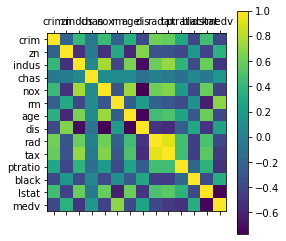

In [8]:
# I want do see co-relation of different values

plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()
plt.show()   # +1 er dike strong co-relation and -1 er dike nagative co-relation

In [9]:
from sklearn.model_selection import train_test_split

X = DataScaled.drop('medv', axis = 1)
print('X shape = ',X.shape)

Y = DataScaled['medv']
print('Y shape = ',Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state = 0)

print('X train shape = ', X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y test shape = ', Y_test.shape)

X shape =  (506, 13)
Y shape =  (506,)
X train shape =  (354, 13)
X test shape =  (152, 13)
Y train shape =  (354,)
Y test shape =  (152,)


In [10]:
import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

#first input and first hidden layer
model = Sequential()
model.add(Dense(20,input_dim=13,activation='relu'))

#secound hidden layer
model.add(Dense(10,activation='relu'))

#output layer
model.add(Dense(1,activation='linear'))


Using TensorFlow backend.


In [11]:
#compele ANN
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
# regression e loss functio holo = mean_squared_error

In [12]:
# fit and display the summary
model.fit(X_train,Y_train, epochs=1000, verbose=1) # verbose ekta visulalization parameter

Epoch 1/1000
354/354 [==============================] - 0s 497us/step - loss: 0.3075 - accuracy: 0.0056
Epoch 2/1000
354/354 [==============================] - 0s 90us/step - loss: 0.2207 - accuracy: 0.0056
Epoch 3/1000
354/354 [==============================] - 0s 90us/step - loss: 0.1838 - accuracy: 0.0056
Epoch 4/1000
354/354 [==============================] - 0s 45us/step - loss: 0.1622 - accuracy: 0.0056
Epoch 5/1000
354/354 [==============================] - 0s 68us/step - loss: 0.1379 - accuracy: 0.0056
Epoch 6/1000
354/354 [==============================] - 0s 90us/step - loss: 0.1128 - accuracy: 0.0056
Epoch 7/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0891 - accuracy: 0.0056
Epoch 8/1000
354/354 [==============================] - 0s 113us/step - loss: 0.0695 - accuracy: 0.0056
Epoch 9/1000
354/354 [==============================] - 0s 113us/step - loss: 0.0590 - accuracy: 0.0056
Epoch 10/1000
354/354 [==============================] - 0s 90us/step 

354/354 [==============================] - 0s 68us/step - loss: 0.0085 - accuracy: 0.0339
Epoch 80/1000
354/354 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.0000e+ - 0s 90us/step - loss: 0.0082 - accuracy: 0.0339
Epoch 81/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0082 - accuracy: 0.0339
Epoch 82/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0080 - accuracy: 0.0339
Epoch 83/1000
354/354 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.06 - 0s 68us/step - loss: 0.0081 - accuracy: 0.0339
Epoch 84/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0081 - accuracy: 0.0339
Epoch 85/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0079 - accuracy: 0.0339
Epoch 86/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0080 - accuracy: 0.0339
Epoch 87/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0080 - accurac

354/354 [==============================] - 0s 68us/step - loss: 0.0064 - accuracy: 0.0367
Epoch 157/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0061 - accuracy: 0.0367
Epoch 158/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0062 - accuracy: 0.0339
Epoch 159/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0060 - accuracy: 0.0339
Epoch 160/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0061 - accuracy: 0.0367
Epoch 161/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0064 - accuracy: 0.0367
Epoch 162/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0063 - accuracy: 0.0339
Epoch 163/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0059 - accuracy: 0.0367
Epoch 164/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0059 - accuracy: 0.0367
Epoch 165/1000
354/354 [==============================] - 0s 45us/step

354/354 [==============================] - 0s 68us/step - loss: 0.0043 - accuracy: 0.0367
Epoch 234/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0044 - accuracy: 0.0367
Epoch 235/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0044 - accuracy: 0.0367
Epoch 236/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0044 - accuracy: 0.0367
Epoch 237/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0043 - accuracy: 0.0367
Epoch 238/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0043 - accuracy: 0.0367
Epoch 239/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0042 - accuracy: 0.0367
Epoch 240/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0043 - accuracy: 0.0367
Epoch 241/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0042 - accuracy: 0.0367
Epoch 242/1000
354/354 [==============================] - 0s 68us/step

354/354 [==============================] - 0s 68us/step - loss: 0.0030 - accuracy: 0.0367
Epoch 312/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0031 - accuracy: 0.0367
Epoch 313/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0031 - accuracy: 0.0367
Epoch 314/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0031 - accuracy: 0.0367
Epoch 315/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0031 - accuracy: 0.0367
Epoch 316/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0033 - accuracy: 0.0367
Epoch 317/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0033 - accuracy: 0.0367
Epoch 318/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0031 - accuracy: 0.0367
Epoch 319/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0041 - accuracy: 0.0367
Epoch 320/1000
354/354 [==============================] - 0s 68us/step

354/354 [==============================] - 0s 68us/step - loss: 0.0026 - accuracy: 0.0367
Epoch 390/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0027 - accuracy: 0.0367
Epoch 391/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0027 - accuracy: 0.0367
Epoch 392/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0025 - accuracy: 0.0367
Epoch 393/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0026 - accuracy: 0.0367
Epoch 394/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0025 - accuracy: 0.0367
Epoch 395/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0025 - accuracy: 0.0367
Epoch 396/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0025 - accuracy: 0.0367
Epoch 397/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0029 - accuracy: 0.0367
Epoch 398/1000
354/354 [==============================] - 0s 68us/step

354/354 [==============================] - 0s 90us/step - loss: 0.0023 - accuracy: 0.0367
Epoch 468/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0026 - accuracy: 0.0367
Epoch 469/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0024 - accuracy: 0.0367
Epoch 470/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0022 - accuracy: 0.0367
Epoch 471/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0022 - accuracy: 0.0367
Epoch 472/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0022 - accuracy: 0.0367
Epoch 473/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0022 - accuracy: 0.0367
Epoch 474/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0026 - accuracy: 0.0367
Epoch 475/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0022 - accuracy: 0.0367
Epoch 476/1000
354/354 [==============================] - 0s 90us/step

354/354 [==============================] - 0s 68us/step - loss: 0.0021 - accuracy: 0.0367
Epoch 545/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0021 - accuracy: 0.0367
Epoch 546/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0022 - accuracy: 0.0367
Epoch 547/1000
354/354 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.03 - 0s 68us/step - loss: 0.0021 - accuracy: 0.0367
Epoch 548/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0020 - accuracy: 0.0367
Epoch 549/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0020 - accuracy: 0.0367
Epoch 550/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0021 - accuracy: 0.0367
Epoch 551/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0020 - accuracy: 0.0367
Epoch 552/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0020 - accuracy: 0.0367
Epoch 553/1000
354/354 [====

354/354 [==============================] - 0s 68us/step - loss: 0.0019 - accuracy: 0.0367
Epoch 622/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0018 - accuracy: 0.0367
Epoch 623/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0018 - accuracy: 0.0367
Epoch 624/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0018 - accuracy: 0.0367
Epoch 625/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0018 - accuracy: 0.0367
Epoch 626/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0019 - accuracy: 0.0367
Epoch 627/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0019 - accuracy: 0.0367
Epoch 628/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0018 - accuracy: 0.0367
Epoch 629/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0020 - accuracy: 0.0367
Epoch 630/1000
354/354 [==============================] - 0s 68us/step

354/354 [==============================] - 0s 90us/step - loss: 0.0018 - accuracy: 0.0367
Epoch 699/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0018 - accuracy: 0.0367
Epoch 700/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0016 - accuracy: 0.0367
Epoch 701/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0016 - accuracy: 0.0367
Epoch 702/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0017 - accuracy: 0.0367
Epoch 703/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0016 - accuracy: 0.0367
Epoch 704/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0017 - accuracy: 0.0367
Epoch 705/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0018 - accuracy: 0.0367
Epoch 706/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0016 - accuracy: 0.0367
Epoch 707/1000
354/354 [==============================] - 0s 68us/step

354/354 [==============================] - 0s 68us/step - loss: 0.0015 - accuracy: 0.0367
Epoch 777/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0017 - accuracy: 0.0367
Epoch 778/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0015 - accuracy: 0.0367
Epoch 779/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0016 - accuracy: 0.0367
Epoch 780/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0017 - accuracy: 0.0367
Epoch 781/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0015 - accuracy: 0.0367
Epoch 782/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0015 - accuracy: 0.0367
Epoch 783/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0017 - accuracy: 0.0367
Epoch 784/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0017 - accuracy: 0.0367
Epoch 785/1000
354/354 [==============================] - 0s 68us/step

354/354 [==============================] - 0s 68us/step - loss: 0.0015 - accuracy: 0.0367
Epoch 854/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0014 - accuracy: 0.0367
Epoch 855/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0015 - accuracy: 0.0367
Epoch 856/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0014 - accuracy: 0.0367
Epoch 857/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0014 - accuracy: 0.0367
Epoch 858/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0014 - accuracy: 0.0367
Epoch 859/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0014 - accuracy: 0.0367
Epoch 860/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0019 - accuracy: 0.0367
Epoch 861/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0020 - accuracy: 0.0367
Epoch 862/1000
354/354 [==============================] - 0s 90us/step

354/354 [==============================] - 0s 90us/step - loss: 0.0014 - accuracy: 0.0367
Epoch 932/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0014 - accuracy: 0.0367
Epoch 933/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0015 - accuracy: 0.0367
Epoch 934/1000
354/354 [==============================] - 0s 90us/step - loss: 0.0015 - accuracy: 0.0367
Epoch 935/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0016 - accuracy: 0.0367
Epoch 936/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0014 - accuracy: 0.0367
Epoch 937/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0015 - accuracy: 0.0367
Epoch 938/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0014 - accuracy: 0.0367
Epoch 939/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0015 - accuracy: 0.0367
Epoch 940/1000
354/354 [==============================] - 0s 90us/step

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Testing the test dataset
Y_predKM = model.predict(X_test)
score = model.evaluate(X_test, Y_test, verbose=0) # verbose = 1 raksi visualization er jonn ..tai varbose = 0 raksi Non visulatization er jonno
print(score[0],'ANN Model Mean Square Error')

0.006852075457572937 ANN Model Mean Square Error


### here, testing er Mean Square Error khub kom ...tar mane ei data set er prediction 100% er khub kasa kasi
# -> tar ei khane khub kom error ase with respect to train and testing

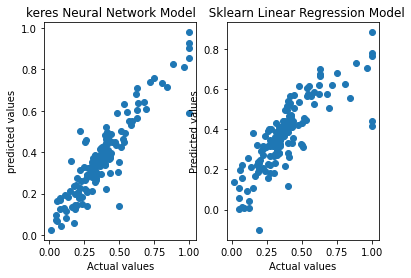

Linear Ression Model Mean Square Error
0.013430106551547263


In [15]:
# Multiple linear regression
from sklearn.linear_model import LinearRegression

LModel = LinearRegression()
LModel.fit(X_train,Y_train)

Y_predLM = LModel.predict(X_test)

plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test,Y_predKM)
plt.xlabel("Actual values")
plt.ylabel('predicted values')
plt.title('keres Neural Network Model     ')

plt.subplot(122)
plt.scatter(Y_test,Y_predLM)
plt.xlabel("Actual values")
plt.ylabel('Predicted values')
plt.title('  Sklearn Linear Regression Model')
plt.show()


from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_predLM)
print('Linear Ression Model Mean Square Error')
print(mse)


# ei khane ANN and Multiple Linear Regression diya difference dekha no hoise 